In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
startup=pd.read_csv('50_Startups.csv')
startup.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
startup.rename(columns={'R&D Spend':'Rnd','Marketing Spend':'Marketing'},inplace=True)

In [53]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

## EDA

In [54]:
startup.isnull()

,Rnd,Administration,Marketing,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|     :     |--------

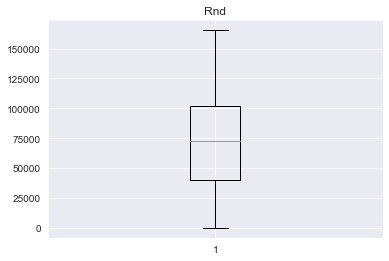

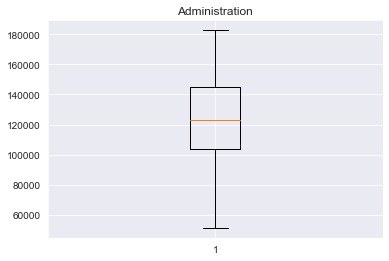

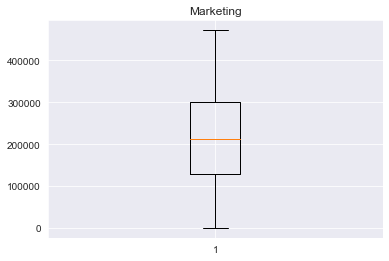

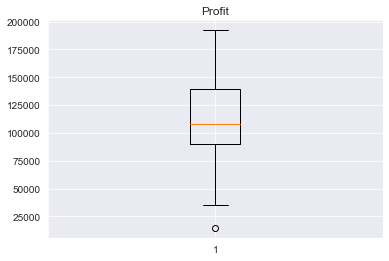

In [55]:
help(plt.boxplot)
plt.boxplot(startup['Rnd'])
plt.title('Rnd')
plt.show()
plt.boxplot(startup['Administration'])
plt.title('Administration')
plt.show()
plt.boxplot(startup['Marketing'])
plt.title('Marketing')
plt.show()
plt.boxplot(startup['Profit'])
plt.title('Profit')
plt.show()

In [56]:
# No duplicated values found
startup.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [57]:
startup.describe()

,Rnd,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [58]:
## Correlation Analysis

In [59]:
startup.corr()

,Rnd,Administration,Marketing,Profit
Rnd,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


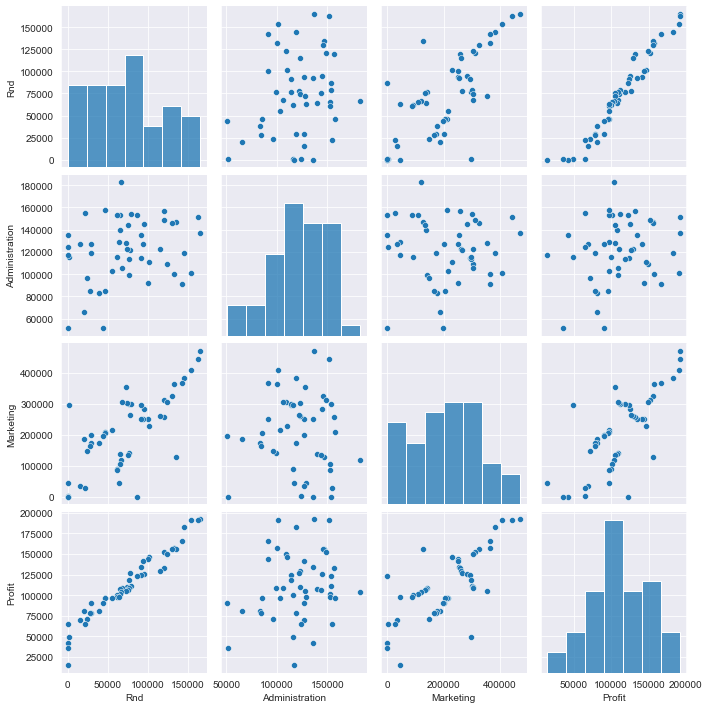

In [60]:
sns.pairplot(startup)
plt.show()

# Model Building

In [61]:
import statsmodels.formula.api as smf

In [62]:
model=smf.ols('Profit~Rnd+Administration+Marketing',data=startup).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        12:20:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Rnd                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Testing

In [64]:
# find out coefficient of parameters
model.params


Intercept         50122.192990
Rnd                   0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [65]:
## find tvalues and pvalues
model.tvalues,np.round(model.pvalues,5)

(Intercept          7.626218
 Rnd               17.846374
 Administration    -0.525507
 Marketing          1.655077
 dtype: float64,
 Intercept         0.00000
 Rnd               0.00000
 Administration    0.60176
 Marketing         0.10472
 dtype: float64)

In [66]:
## find rsquared values
model.rsquared,model.rsquared_adj 
## model accuaracy  94.75%

(0.9507459940683246, 0.9475337762901719)

In [67]:
### Slr model for insingificant values
slr_marketing=smf.ols('Profit~Marketing',data=startup).fit()
slr_marketing.tvalues,slr_marketing.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [68]:
slr_administration=smf.ols('Profit~Administration',data=startup).fit()
slr_administration.tvalues,slr_administration.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [69]:
slr_ma=smf.ols('Profit~Administration+Marketing',data=startup).fit()
slr_ma.tvalues,slr_ma.pvalues

(Intercept         1.142741
 Administration    2.467779
 Marketing         8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 Marketing         9.727245e-11
 dtype: float64)

# Model Validation 


# 1.Collinearty check

In [70]:
# 1 .Collinearity problem check
# Calculate vif= 1/1-rsquared

rsq_rnd=smf.ols('Rnd~Administration+Marketing',data=startup).fit().rsquared
vif_rnd=1/(1-rsq_rnd)

rsq_admin=smf.ols('Administration~Marketing+Rnd',data=startup).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_mark=smf.ols('Marketing~Rnd+Administration',data=startup).fit().rsquared
vif_mark=1/(1-rsq_mark)


vif_df=pd.DataFrame({'Variables':['Rnd','admin','mark'],'Vif':[vif_rnd,vif_admin,vif_mark]})
vif_df

,Variables,Vif
0,Rnd,2.468903
1,admin,1.175091
2,mark,2.326773


In [71]:
## No varible >20 so no collinearty,consider all regression

# 2.Residual analysis

In [72]:
import statsmodels.api as sm

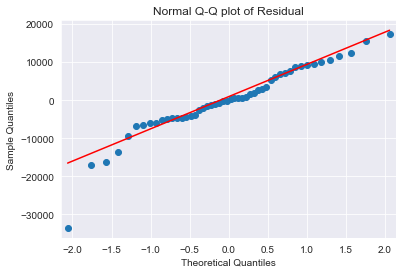

In [73]:
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residual')
plt.show()

In [74]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [75]:
# test for Homoscadasticity or Heteroscedasticity(plotting Models standardized fitted values vs standardized residual values)
def standard_values(vals): 
    return (vals-vals.mean())/vals.std() 

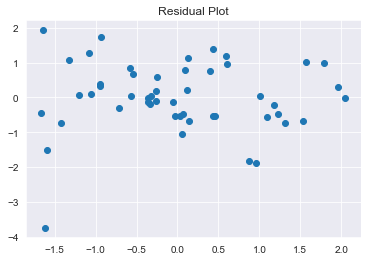

In [81]:
sns.set_style(style='darkgrid')
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.show()

In [82]:
# Test for errors or Residuals vs regressors or independnet 'x' variable or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


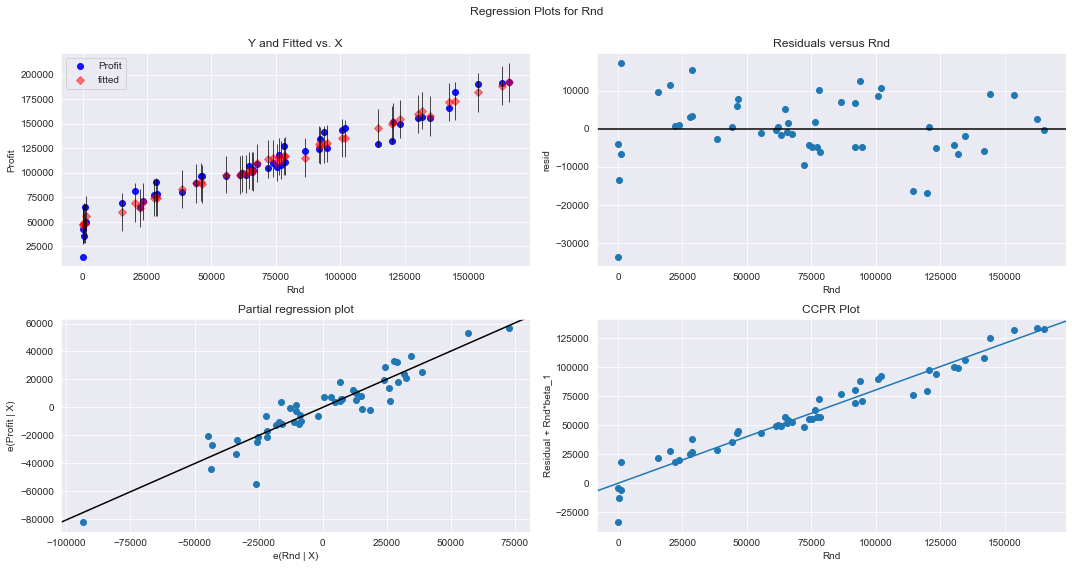

In [83]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Rnd',fig=fig)
plt.show()

eval_env: 1


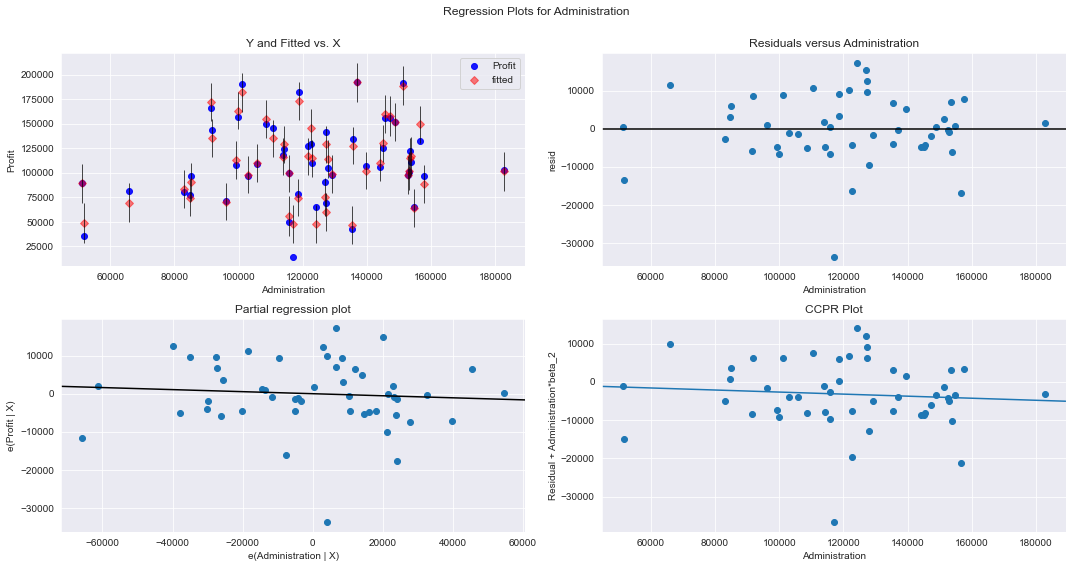

In [84]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


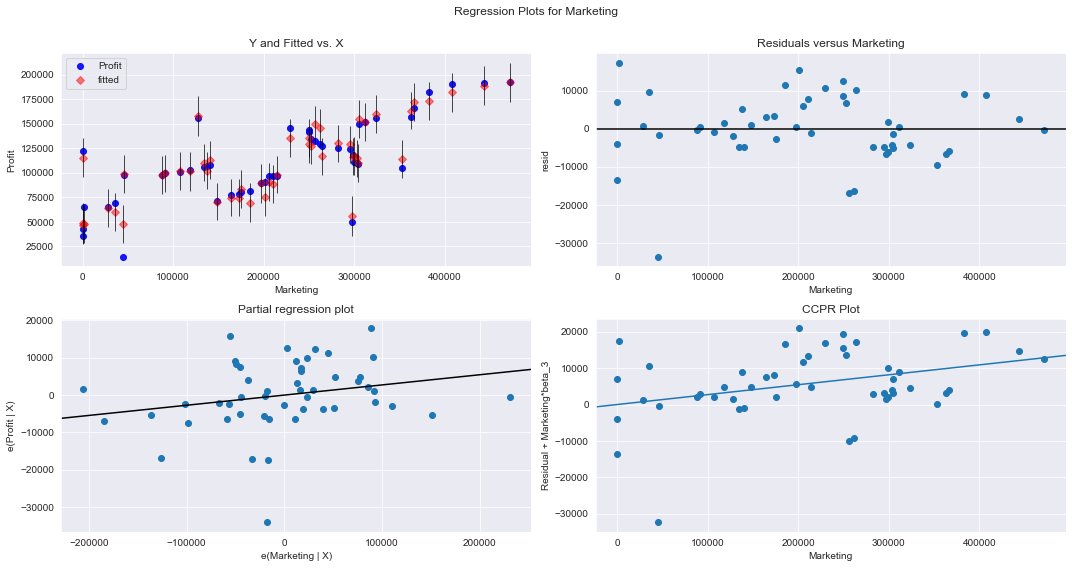

In [85]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or influencers)

In [86]:
# 1.Cook's Distance:
# if cook's distance > 1, then its an outlier
#get influencer using cooks distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

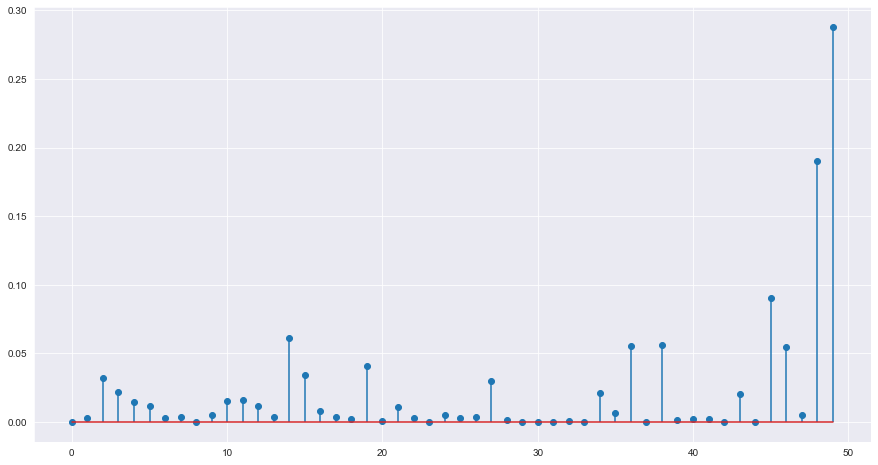

In [87]:
#plot the influencers using the stem plot
fig=plt.figure(figsize=(15,8))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.xlabel=('Row index')
plt.ylabel=('Cooks distance')
plt.show()

In [88]:
#index and vaues of influencers where c>0.5
np.argmax(c),np.max(c)

(49, 0.28808229275432623)

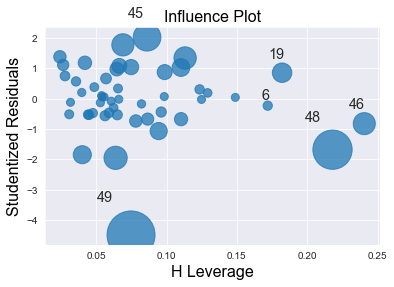

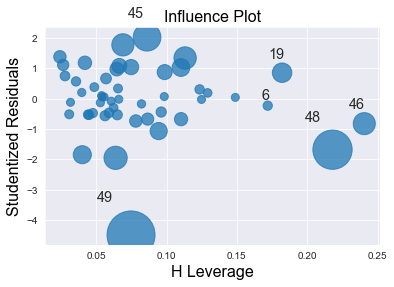

In [89]:
# 2 Leverage value using high influencepoint : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [90]:
# Leverage Cuttoff value=3*(k+1)/n:
# k = no.of features/columns & n = no. of datapoints

startup.shape

(50, 5)

In [91]:
## k = Column=5
## n = number of rows= 50

k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff=(3*(k+1)/n)
leverage_cutoff

0.36

In [92]:
startup[startup.index.isin([49])]

,Rnd,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model 

In [93]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
stup=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
stup

,Rnd,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model


In [94]:
while np.max(c)>0.5:
    model=smf.ols('Profit~Rnd+Administration+Marketing',data=startup).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    stup=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
    stup
else:
    final_model=smf.ols('Profit~Rnd+Administration+Marketing',data=stup).fit()
    final_model.rsquared,final_model.aic
    print('Thus model accuracy is improved to',final_model.rsquared)
    

Thus model accuracy is improved to 0.9613162435129847


In [49]:
while model.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model=smf.ols("Profit~Rnd+Administration+Marketing",data=startup).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=startup.drop(startup.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~Rnd+Administration+Marketing",data=startup).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is improved to 0.9507459940683246
Thus model accuracy is impro

KeyboardInterrupt: 

In [102]:
while model.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model=smf.ols("Profit~Rnd+Administration+Marketing",data=startup).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        startup=startup.drop(startup.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~Rnd+Administration+Marketing",data=startup).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847
Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improve

In [103]:
final_model.rsquared

0.9882757054424702

In [104]:
stup

,Rnd,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model prediction


In [105]:
# New data
new_data=pd.DataFrame({'Rnd':60000,'Administration':100000,'Marketing':150000},index=[0])

In [106]:
new_data

,Rnd,Administration,Marketing
0,60000,100000,150000


In [107]:
# Manual Prediction of price
final_model.predict(new_data)

0    98650.484001
dtype: float64

In [108]:
# Automatic Prediction
pred_y=final_model.predict(stup)
pred_y

0     187863.790647
1     185009.876463
2     175673.318956
3     168663.939346
4     165589.539700
5     158552.826483
6     150566.229650
7     156789.000710
8     149524.698853
9     150122.356712
10    131732.588994
11    131361.441889
12    127553.957119
13    126598.769555
14    146708.468250
15    142327.892690
16    117097.108361
17    130104.785747
18    127878.387928
19    111267.229013
20    117298.757074
21    119853.601084
22    116179.813432
23    111329.242429
24    110009.916133
25    102331.717613
26    109661.804131
27    117355.152986
28    103462.767086
29    101874.612012
30     97655.794577
31     97872.919535
32     96858.382686
33     98654.449007
34     93583.600868
35     91186.568204
36     80020.752524
37     88571.938968
38     71855.260356
39     84521.312916
40     78528.002935
41     76670.262623
42     73237.524757
43     63084.576591
44     68075.710756
45     51352.267495
46     65293.553868
47     50857.517057
48     49088.678956
dtype: float64

In [109]:
#table contaning Rsquared value for each prepared model
d2={'Prep_models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_models,Rsquared
0,Model,0.990667
1,Final_Model,0.988276
